In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = '0.2'

In [2]:
%matplotlib inline

In [3]:
#2-dimensional dataset with 4 unlabeled clusters
np.random.seed(44)
X = np.zeros((400, 2))
X[:100, :] = np.random.randn(100, 2) * 0.5 + np.array([2, 2])
X[100:200, :] = np.random.randn(100, 2) * 0.5 + np.array([-2, 2])
X[200:300, :] = np.random.randn(100, 2) * 0.5 + np.array([-2, -2])
X[300:, :] = np.random.randn(100, 2) * 0.5 + np.array([2, -2])

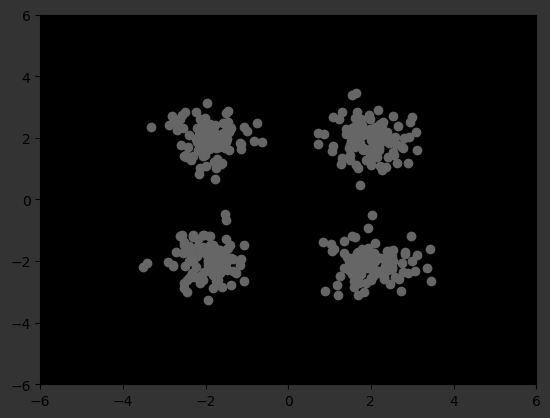

In [4]:
plt.axes().set_facecolor('black')
plt.scatter(X[:,0], X[:,1], c='0.4')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.show()

In [5]:
#3dimensional dataset with 5 unlabeled clusters
np.random.seed(44)

means = [[0, 0, 0],
         [4, 4, 4],
         [8, 8, 8],
         [9, 9, 0],
         [2, 7, 9]]
std = 1
clusters = []

for i in means:
    clusters.append(np.random.normal(i, std, size=(80, 3)))
data = np.array(clusters)
data.resize((400,3))
data

array([[-0.75061472,  1.31635732,  1.24614003],
       [-1.60491574, -1.46814368, -1.71507046],
       [ 1.85878369,  0.08758798, -0.0523222 ],
       ...,
       [ 2.94833985,  7.55739678,  8.61133207],
       [ 0.49670877,  5.7156611 ,  8.24903113],
       [ 1.88180818,  7.16842926,  8.32152011]])

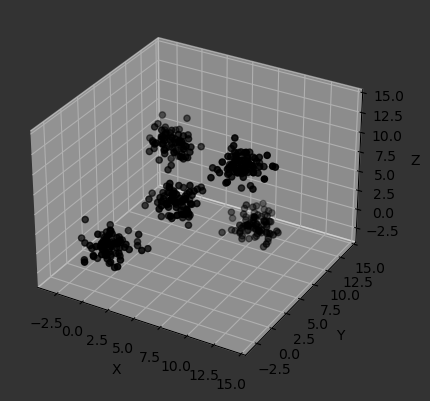

In [6]:
fig = plt.figure()
fig.patch.set_facecolor('0.2')
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('0.2')

ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='black')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-4, 15)
ax.set_ylim(-4, 15)
ax.set_zlim(-4, 15)
plt.show()

------

------

# Lloyd's algorithm

In [7]:
k = 4 # number of clusters
max_iterations = 100

In [8]:
#simple random sampling

# np.random.seed(42)
# initial_indices = np.random.choice(X.shape[0], size=k, replace=False)
# centroids = X[initial_indices, :]
# centroids 

In [9]:
#sytematic sampling

np.random.seed(42)
initial_indices = np.linspace(0, len(X)-1, k, dtype=int)
centroids = X[initial_indices, :]
print(initial_indices)
centroids

[  0 133 266 399]


array([[ 1.62469264,  2.65817866],
       [-2.52051922,  1.40157307],
       [-2.45347964, -2.99962943],
       [ 0.89812529, -2.9827395 ]])

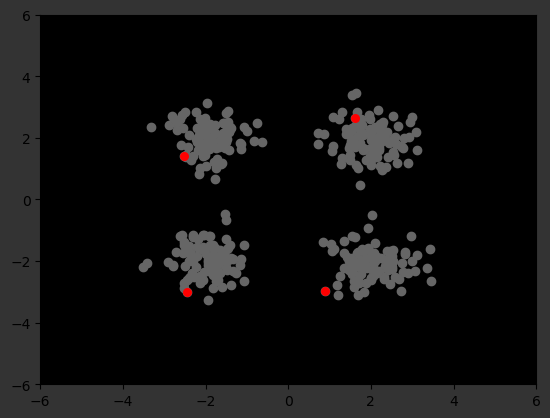

In [10]:
plt.axes().set_facecolor('black')
plt.scatter(X[:,0], X[:,1], c='0.4')
plt.scatter(centroids[:,0], centroids[:,1],zorder=2, color='red', s=30)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.show()

In [11]:
for i in range(max_iterations):
    # calculate Euclidean distances from each data point to each centroid
    distances = np.sqrt(np.sum((X[:, np.newaxis, :] - centroids[np.newaxis, :, :]) ** 2, axis=2))
    
    # assign each data point to the closest centroid
    labels = np.argmin(distances, axis=1)
    
    # calculate new centroids as the mean of each cluster
    new_centroids = np.array([X[labels == j, :].mean(axis=0) for j in range(k)])

    if np.allclose(centroids, new_centroids):
        break
    
    centroids = new_centroids

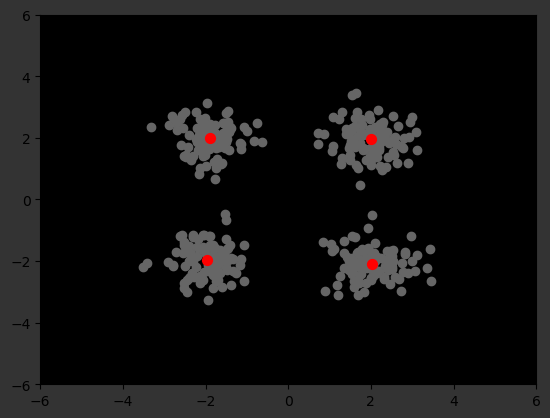

In [12]:
plt.axes().set_facecolor('black')
plt.scatter(X[:,0], X[:,1], c='0.4')
plt.scatter(new_centroids[:,0], new_centroids[:,1],zorder=2, color='red', s=50)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.show()

In [13]:
X_labeled = np.column_stack((X, labels))
np.random.shuffle(X_labeled) # just to make sure...
X_labeled 

array([[-1.93070185, -1.96719431,  2.        ],
       [-1.69987603, -2.11177401,  2.        ],
       [ 2.06646241,  1.69146018,  0.        ],
       ...,
       [-2.71034823, -1.69038602,  2.        ],
       [ 1.52249051, -2.25187079,  3.        ],
       [-1.61572104,  2.0863023 ,  1.        ]])

In [14]:
idx_sorted = np.argsort(X_labeled[:, -1])
X_labeled_sorted = X_labeled[idx_sorted, :]
X_labeled_sorted[:, -1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [15]:
labels, counts = np.unique(X_labeled[:, -1], return_counts=True)
label_counts = dict(zip(labels, counts))

for label in label_counts:
    print("Cluster {}: {} data points".format(label+1, label_counts[label]))

Cluster 1.0: 100 data points
Cluster 2.0: 100 data points
Cluster 3.0: 100 data points
Cluster 4.0: 100 data points


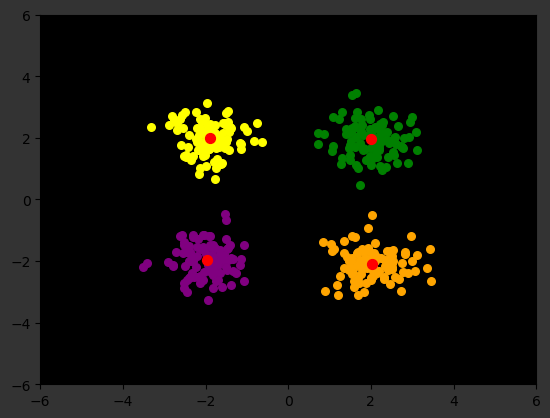

In [16]:
plt.axes().set_facecolor('black')
plt.scatter(new_centroids[:,0], new_centroids[:,1],zorder=2, color='red', s=50)
plt.scatter(X[:100, 0],X[:100, 1] ,zorder=1, color='green', s=30)
plt.scatter(X[100:200, 0],X[100:200, 1] ,zorder=1, color='yellow', s=30)
plt.scatter(X[200:300, 0],X[200:300, 1] ,zorder=1, color='purple', s=30)
plt.scatter(X[300:, 0],X[300:, 1] ,zorder=1, color='orange', s=30)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.show()

-----

In [17]:
def kmeans(data, k, max_iterations):
    
    centroids = data[np.linspace(0, len(data)-1, k, dtype=int)]
    
    for i in range(max_iterations):
        
        labels = np.argmin(((data - centroids[:, np.newaxis])**2).sum(axis=2), axis=0)
        
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        if np.allclose(centroids, new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

In [18]:
labels, centroids = kmeans(data, 5, 50)
data_labeled = np.column_stack((data, labels))
np.random.shuffle(data_labeled) #just to make sure...
data_labeled

array([[ 9.15114124, 10.02611107, -0.84143677,  3.        ],
       [ 0.31848572, -0.07871969,  1.47719317,  0.        ],
       [ 7.6782696 ,  8.28440883,  7.20039086,  2.        ],
       ...,
       [ 2.7954678 ,  1.51680792, -0.57138107,  0.        ],
       [-0.39564672, -0.67012178,  0.31978556,  0.        ],
       [ 8.78603941, 10.44097793, -1.91333256,  3.        ]])

In [19]:
idx_sorted2 = np.argsort(data_labeled[:, -1])
data_sorted = data_labeled[idx_sorted2, :]
data_sorted[:, -1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [20]:
labels, counts = np.unique(data_labeled[:, -1], return_counts=True)

for label in label_counts:
    print("Cluster {}: {} data points".format(label+1, label_counts[label]))

Cluster 1.0: 100 data points
Cluster 2.0: 100 data points
Cluster 3.0: 100 data points
Cluster 4.0: 100 data points


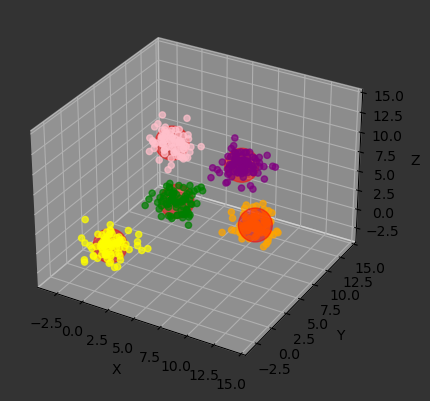

In [21]:
fig = plt.figure()
fig.patch.set_facecolor('0.2')
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('0.2')


ax.scatter(data_sorted[320:, 0], data_sorted[320:, 1], data_sorted[320:, 2], c='pink', alpha=0.7)
ax.scatter(data_sorted[240:320, 0], data_sorted[240:320, 1], data_sorted[240:320, 2], c='orange', alpha=0.7)
ax.scatter(data_sorted[160:240, 0], data_sorted[160:240, 1], data_sorted[160:240, 2], c='purple', alpha=0.7)
ax.scatter(data_sorted[80:160, 0], data_sorted[80:160, 1], data_sorted[80:160, 2], c='green', alpha=0.7)
ax.scatter(data_sorted[:80, 0], data_sorted[:80, 1], data_sorted[:80, 2], c='yellow', alpha=0.7)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red',s=600, alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-4, 15)
ax.set_ylim(-4, 15)
ax.set_zlim(-4, 15)
plt.show()

--------

-------

# k-means++

While Lloyd's algorithm initializes the centroids randomly, k-means++ uses a more sophisticated initialization method that selects centroids that are well-separated and representative of the data.

In [22]:
data.shape

(400, 3)

In [25]:
def kmeans_pp(data, k, max_iterations=100):
    # Initialize the centroids using k-means++ algorithm
    centroids = [data[np.random.randint(data.shape[0])]]
    while len(centroids) < k:
        distances = np.array([min([np.linalg.norm(point-centroid) for centroid in centroids]) for point in data])
        probs = distances / distances.sum()
        cumprobs = probs.cumsum()
        r = np.random.rand()
        for j, cumprob in enumerate(cumprobs):
            if r < cumprob:
                centroids.append(data[j])
                break

    centroids = np.array(centroids)
    
    # Run Lloyd's algorithm with the chosen centroids as initial centroids
    for i in range(max_iterations):
        labels = np.argmin(((data - centroids[:, np.newaxis])**2).sum(axis=2), axis=0)
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        if np.allclose(centroids, new_centroids):
            break
            
        centroids = new_centroids
    
    return labels, centroids